## **PhantomSounds**

This is from [Google's 2025 CTF Begginer's quest](https://capturetheflag.withgoogle.com/beginners-quest) titled "PhantomSounds".

> "It's a catchy song... but is there more than meets the eye?"

In [2]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
plt.style.use('dark_background')

rate, data = wavfile.read("uploads/spectrogram_challenge.wav")

The file was titles "spectogram_challenge.wav" which gives us our first hint of having to plot a spectogram

ValueError: operands could not be broadcast together with shapes (2048,2,1315) (2048,1) 

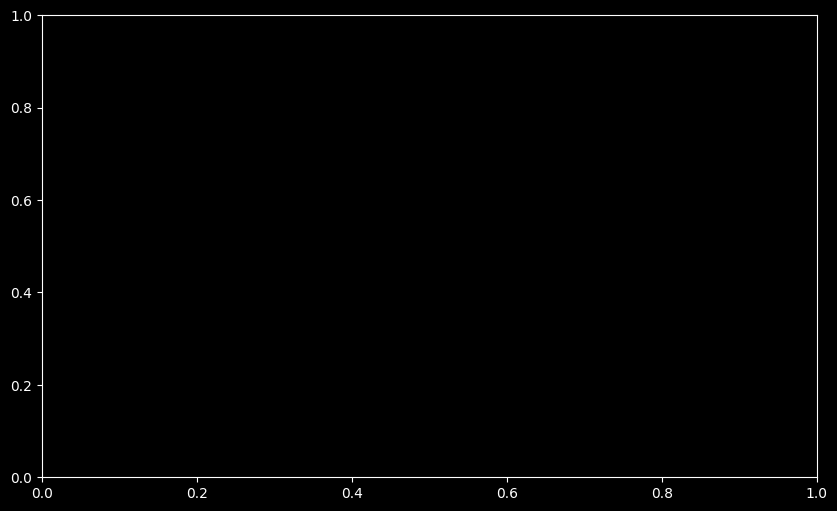

In [3]:
plt.figure(figsize=(10,6))
plt.specgram(data, Fs=rate, NFFT=2048, noverlap=1024, cmap="inferno")
plt.title("Spectrogram of WAV")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity (dB)')
plt.show()

Hmmmmmmmm... we were returned an error saying `ValueError: operands could not be broadcast together with shapes (2048,2,1315) (2048,1)`. `(2048, 2, 1315)` tells us that we've got 2 channels in our segmented audio data - this is called **stereo audio**. But the window array our data is being multiplied with is 1. Which leaves us with 2 ways to approach this problem:
1. Plot each channel separately
2. Average the channels to combine our stereo audio into mono audio

We'll go with the latter.

In [4]:
d = pd.DataFrame(data)
d.tail()

,0,1
1348097,-13284,-16009
1348098,-13872,-15001
1348099,-13930,-13884
1348100,-14014,-13405
1348101,-13405,-12586


These are the 2 channels 

### Approach #1

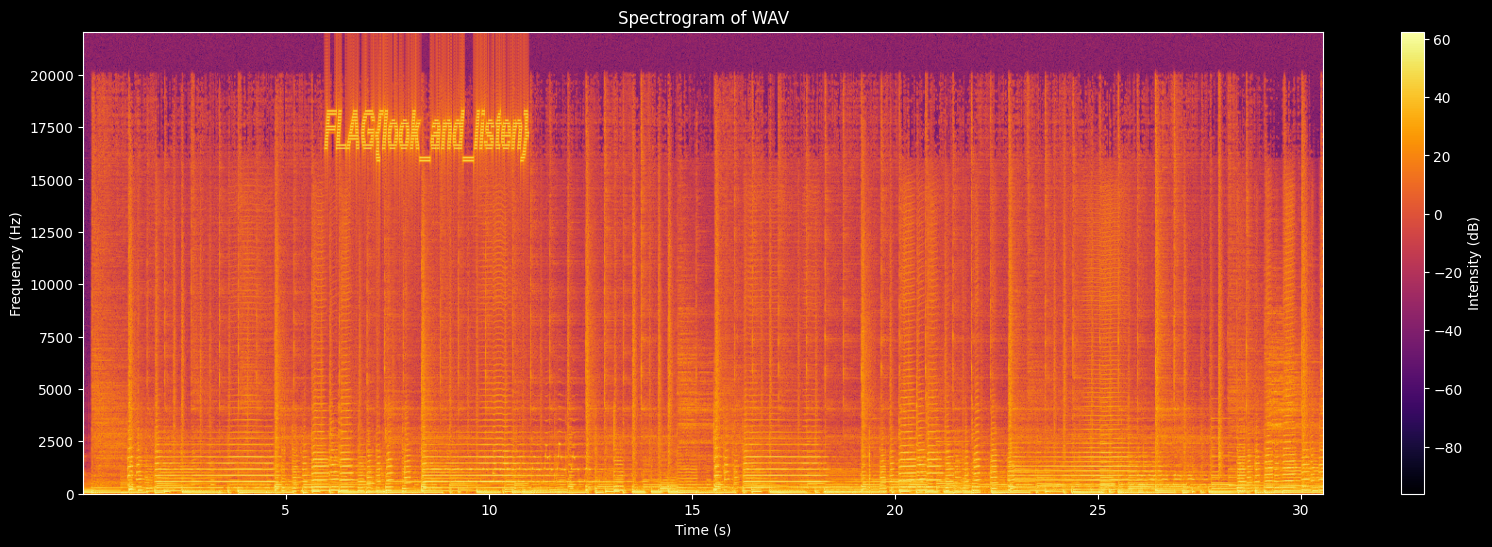

In [7]:
if len(data.shape) == 2:
    data_mono = data.mean(axis=1)

plt.figure(figsize=(20,6))
plt.specgram(data_mono, Fs=rate, NFFT=2048, noverlap=1024, cmap="inferno")
plt.title("Spectrogram of WAV")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity (dB)')
plt.show()

And there it is! Our flag `FLAG{look_and_listen}` >:]

### Approach #2

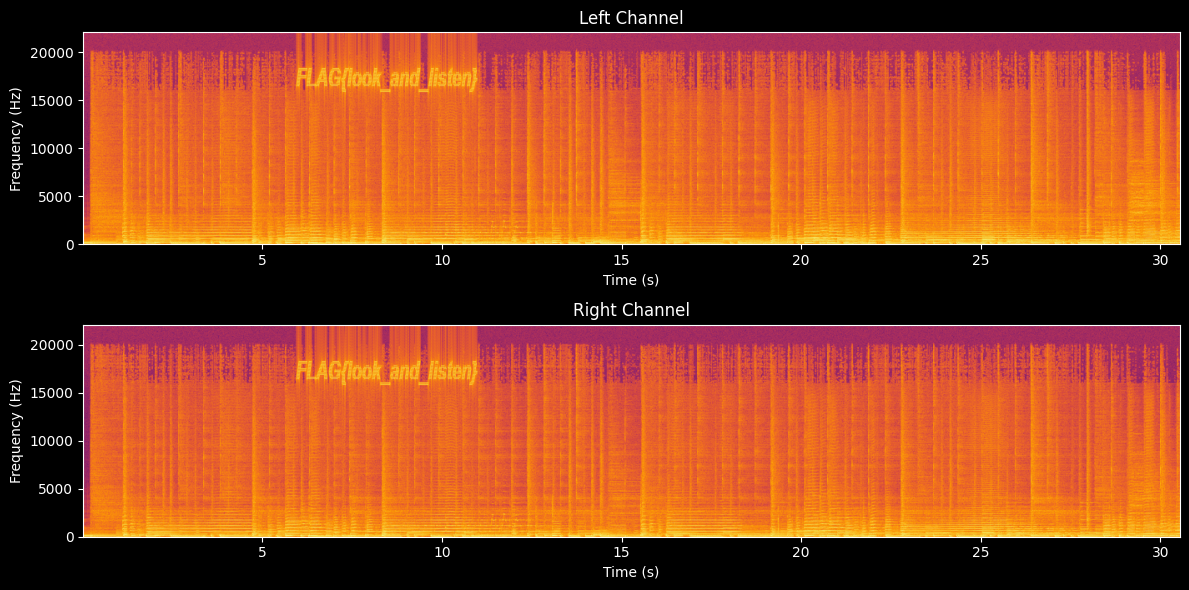

In [ ]:
def plot_channel(signal, rate, title, subplot_pos):
    plt.subplot(2, 1, subplot_pos)
    plt.specgram(signal, Fs=rate, NFFT=2048, noverlap=1024, cmap='inferno')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

left = data[:, 0]
right = data[:, 1]

plt.figure(figsize=(12, 6))
plot_channel(left, rate, "Left Channel", 1)
plot_channel(right, rate, "Right Channel", 2)
plt.tight_layout()
plt.show()
